## load data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_f = '/home/ytanigaw/data/pacbio/sorted_final_merged.bam.stats'

In [3]:
df = pd.read_csv(data_f, sep = ' ', names=['chr', 'MAPQ', 'len'], nrows = 1000000)

## plot read length dist

In [14]:
df.len

0       9736
1      14029
2       5344
3       5072
4       1461
5       3266
6       7590
7       2066
8       6681
9       6034
10      7058
11      1530
12      3492
13      2583
14      1395
15      2860
16      8184
17      2334
18      4761
19      3713
20      2673
21      4239
22      4473
23      2945
24      3366
25      4869
26      1369
27      4135
28      2056
29     16751
       ...  
970     3686
971     2365
972     3452
973     4329
974     2174
975     2459
976     1885
977     6740
978     1322
979     2518
980     5434
981     6203
982     4666
983     7856
984     4253
985     1554
986     2018
987     1440
988     2741
989     4297
990     1845
991     4865
992     7407
993    10826
994     5462
995     8117
996     6249
997     2311
998     6950
999     4056
Name: len, dtype: int64

In [14]:
%matplotlib inline
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt

/home/ytanigaw/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [19]:
def make_hist(x, nbins = 20, title = None, xlabel = None, ylabel = None, filename = None):
    '''
    This function generates histogram of a vector x and save to file
    Inputs:
      x: data vector
      title:    title of the plot
      xlabel:   label on x-axis
      ylabel:   label on y-axis
      filename: name of the image file (if given, save to file)
    Returns:
      matlab plot object
    Side effect:
      save an image file if filename is given
    '''
    
    import matplotlib
    matplotlib.use('agg')
    from matplotlib import pyplot as plt
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.hist(x, nbins)
    
    if(xlabel != None):
        ax.set_xlabel(xlabel)
    if(ylabel != None):
        ax.set_ylabel(ylabel)
    if(title != None):
        ax.set_title(title)
    if(filename != None):
        fig.savefig(filename)
    
    return(fig)

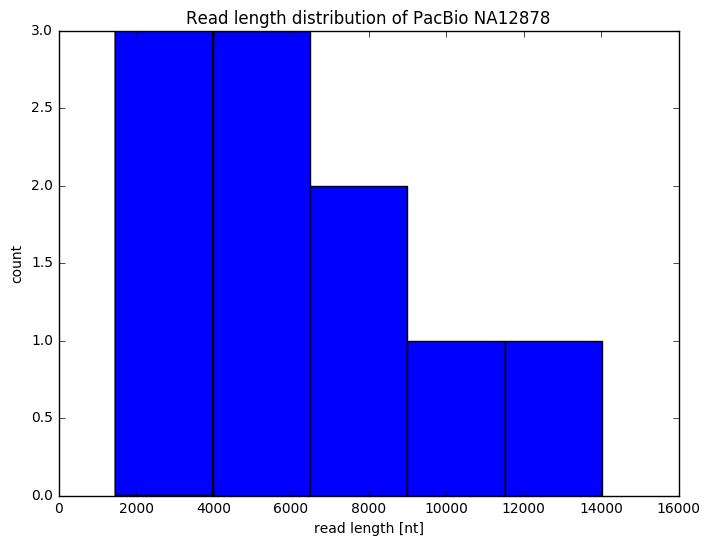

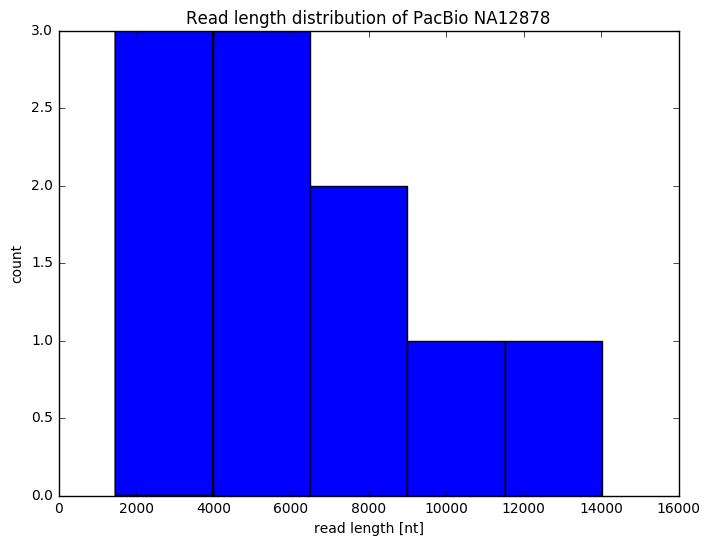

In [24]:
make_hist(x = df.ix[:, 2], nbins = 5, title='Read length distribution of PacBio NA12878',
          xlabel='read length [nt]', ylabel = 'count', filename = data_f + '.hist.png')

## filtering 

In [46]:
df = pd.read_csv(data_f, sep = ' ', names=['chr', 'MAPQ', 'len'])

In [58]:
len(df)

68064542

In [48]:
selected = df[(df.MAPQ >= 50) & (df.len > 20000)]

In [59]:
len(selected)

344154

In [60]:
selected_stats = selected.groupby('chr').agg(['mean', 'count'])